
# Importando bibliotecas

In [ ]:
import pandas as pd            # biblioteca para manipulação de dados
import numpy as np             # biblioteca para utilização de vetores e matrizes
import matplotlib.pyplot as plt # biblioteca para graficos


# Carregando dados

Lendo o csv que contem as bases de dados

In [ ]:
data_clients = pd.read_csv('Clients.csv')

# Pré-processamento de dados, visualização de características e processamento

Visualização das 10 primeiras linhas

In [ ]:
data_clients.head(10)

,Unnamed: 0,clientId,shopId,gender,maritalStatus,age,numberOfDependents,education,flagResidencialPhone,areaCodeResidencialPhone,bestPaymentDay,shopRank,residenceType,monthsInResidence,flagMothersName,flagFathersName,flagResidenceTown_WorkingTown,flagResidenceState_WorkingState,monthsInTheJob,professionCode,mateIncome,flagResidencialAddress_PostalAddress,flagOtherCard,quantityBankingAccounts,flagMobilePhone,flagContactPhone,personalNetIncome,codeApplicationBooth,BAD
0,1,2,15,F,S,18,0,NaN,Y,31,20,0,P,216,Y,Y,Y,Y,12,853,0.0,Y,N,0,N,N,300.0,0,0
1,2,4,12,F,C,47,0,NaN,N,31,25,0,P,180,Y,Y,N,Y,24,35,0.0,Y,N,0,N,N,304.0,0,0
2,3,5,16,F,S,28,0,NaN,Y,31,25,0,O,12,Y,Y,Y,Y,12,24,0.0,Y,N,0,N,N,250.0,0,0
3,4,6,24,M,S,26,0,NaN,N,31,28,0,P,180,Y,Y,N,Y,0,999,0.0,Y,N,0,N,N,800.0,0,0
4,5,7,55,F,S,22,0,NaN,Y,31,12,0,A,0,Y,Y,Y,Y,48,999,0.0,Y,N,0,N,N,410.0,0,0
5,6,8,6,F,C,21,0,NaN,Y,23,28,0,A,24,Y,Y,Y,Y,12,40,800.0,Y,N,0,N,N,248.0,0,0
6,7,9,3,F,S,27,0,NaN,Y,31,20,0,A,0,Y,Y,Y,Y,0,950,0.0,Y,N,0,N,N,1000.0,0,1
7,8,10,23,F,C,57,0,NaN,Y,31,12,0,P,24,Y,Y,N,Y,96,13,0.0,Y,N,0,N,N,856.0,0,0
8,9,11,25,F,S,53,0,NaN,Y,31,18,0,P,60,Y,Y,N,Y,24,13,0.0,Y,N,0,N,N,738.0,0,1
9,10,12,12,F,C,32,0,NaN,Y,31,12,0,P,24,Y,Y,N,Y,0,165,0.0,Y,N,0,N,N,700.0,0,0


**De acordo com os dados fornecidos, podemos mostrar o objetivo do trabalho: objetivo é tentar prever e minimizar a quantidade de BAD (cliente ruim = 1 e cliente bom = 0).**
O descritivo das variáveis:

**clientId**: Key para o tomador.

**shopId**: Key do empréstimo.

**gender**: Gênero do tomador.

**maritalStatus**: Estado civil do tomador.

**age**: Idade do tomador.

**numberOfDependents**: Quantidade de dependentes do tomador.

**education**: Nível educacional do tomador.

**flagResidencialPhone**: Flag se o tomador possui telefone residencial ou não.

**areaCodeResidencialPhone**: Codigo de area do telefone residencial.

**bestPaymentDay**: Melhor dia para pagamento do empréstimo.

**shopRank**: Ranking do empréstimo.

**residenceType**: Tipo de residência.

**monthsInResidence**: Tempo vivendo na mesma residência.

**flagMothersName**: Tomador registrou o nome da mãe na requisição de empréstimo.

**flagFathersName**: Tomador registrou o nome do pai na requisição de empréstimo.

**flagResidenceTown_WorkingTown**: Flag se o tomador vive na mesma cidade em que trabalha.

**flagResidenceState_WorkingState**: Flag se o tomador vive no mesmo estado que trabalha.

**monthsInTheJob**: Tempo no emprego atual.

**professionCode**: Código de profissão do tomador.

**mateIncome**: Renda do cônjuge do tomador.

**flagResidencialAddress_PostalAddress**: Flag de validação do CEP do tomador.

**flagOtherCard**: Y=Yes, N=No; Se o requerente possuir outro cartão de crédito ou private label

**quantityBankingAccounts**: Quantidade de contas bancárias do tomador.

**flagMobilePhone**: Flag se o tomador possui telefone celular.

**flagContactPhone**: Flag se o tomador possui um telefone de contato.

**personalNetIncome**: Renda média líquida mensal do tomador.

**codeApplicationBooth**: Código de onde a solicitação de empréstimo veio.

**BAD**: Flag se o tomador veio atrasou o pagamento do empréstimo.

Segue agora as classes das variáveis categóricas e binárias:

**gender**: F = Feminino e M = Masculino

**maritalStatus**: S = Solteiro, C = Casado, D = Divorciado, V = Viúvo e O = Outro.

**residenceType**: P = Própria, A = Aluguel, C = Mora com os pais e O = Outro.

**flags**: Y = Sim e N = Não

**BAD**: 0 = Cliente Adimplente e 1 = Cliente Inadimplente


Verificando os tipos de dados

In [ ]:
data_clients.dtypes

Unnamed: 0                                int64
clientId                                  int64
shopId                                    int64
gender                                   object
maritalStatus                            object
age                                       int64
numberOfDependents                        int64
education                               float64
flagResidencialPhone                     object
areaCodeResidencialPhone                  int64
bestPaymentDay                            int64
shopRank                                  int64
residenceType                            object
monthsInResidence                         int64
flagMothersName                          object
flagFathersName                          object
flagResidenceTown_WorkingTown            object
flagResidenceState_WorkingState          object
monthsInTheJob                            int64
professionCode                            int64
mateIncome                              

**verificando as informações de cada dado**

In [ ]:
data_clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 29 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            40000 non-null  int64  
 1   clientId                              40000 non-null  int64  
 2   shopId                                40000 non-null  int64  
 3   gender                                39997 non-null  object 
 4   maritalStatus                         40000 non-null  object 
 5   age                                   40000 non-null  int64  
 6   numberOfDependents                    40000 non-null  int64  
 7   education                             0 non-null      float64
 8   flagResidencialPhone                  40000 non-null  object 
 9   areaCodeResidencialPhone              40000 non-null  int64  
 10  bestPaymentDay                        40000 non-null  int64  
 11  shopRank       

## **Visualização dos dados**
**Visualizando quantas linhas e colunas há no dado**

In [ ]:
print('O numero de linhas e colunas é:\n',data_clients.shape)

O numero de linhas e colunas é:
 (40000, 29)


**Vizualização de dados faltantes**

In [ ]:
print('O numero de dados faltantes em cada uma das colunas é:\n',data_clients.isnull().sum())

O numero de dados faltantes em cada uma das colunas é:
 Unnamed: 0                                  0
clientId                                    0
shopId                                      0
gender                                      3
maritalStatus                               0
age                                         0
numberOfDependents                          0
education                               40000
flagResidencialPhone                        0
areaCodeResidencialPhone                    0
bestPaymentDay                              0
shopRank                                    0
residenceType                               0
monthsInResidence                           0
flagMothersName                             0
flagFathersName                             0
flagResidenceTown_WorkingTown               0
flagResidenceState_WorkingState             0
monthsInTheJob                              0
professionCode                              0
mateIncome              

**Há 3 dados faltantes em Gender, assim verificaremos qual o dado mais se repete em Gender e assim substituí-los**

In [ ]:
print('A moda em gender é:\n', data_clients['gender'].mode())

A moda em gender é:
 0    F
dtype: object


**A moda nos dados é Female, assim podemos substituir os dados faltantes por F para que assim não percamos informações**

**Trocando os dados faltantes (NaN) pela moda da coluna**

In [ ]:
values = {'gender':data_clients.gender.mode()[0]}

**Atribuindo os novos valores**

In [ ]:
data_clients.fillna(value=values,inplace=True)

**Vizualizando os dados faltantes**

In [ ]:
data_clients['gender'].isnull().sum()

0

In [ ]:
print('Percebemos que toda a coluna de education é do tipo float e é composta de elementos nulos:\n',data_clients['education'].isnull().sum())

Percebemos que toda a coluna de education é do tipo float e é composta de elementos nulos:
 40000


**Tirando a coluna de elementos nulos**

In [ ]:
data_clients = data_clients.drop('education',axis=1)

**Verificando novamente as linhas e colunas**

In [ ]:
print('O novo numero de linhas e colunas é:\n',data_clients.shape)

O novo numero de linhas e colunas é:
 (40000, 28)


**Fazendo uma análise estatística:**

In [ ]:
data_clients.describe()

,Unnamed: 0,clientId,shopId,age,numberOfDependents,areaCodeResidencialPhone,bestPaymentDay,shopRank,monthsInResidence,monthsInTheJob,professionCode,mateIncome,quantityBankingAccounts,personalNetIncome,codeApplicationBooth,BAD
count,40000.00000,40000.000000,40000.000000,40000.000000,40000.0,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.0,4.000000e+04,40000.0,40000.000000
mean,20000.50000,24982.227000,20.822950,34.649725,0.0,33.812275,15.313950,0.015950,152.921100,50.629500,484.611875,50.993333,0.0,9.752711e+03,0.0,0.197500
std,11547.14972,14428.531759,14.571913,13.076200,0.0,10.402941,7.159757,0.212124,136.096962,73.875139,382.102372,507.159125,0.0,4.856335e+05,0.0,0.398118
min,1.00000,2.000000,1.000000,15.000000,0.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.0,0.000000
25%,10000.75000,12458.750000,12.000000,23.000000,0.0,31.000000,9.000000,0.000000,36.000000,12.000000,88.000000,0.000000,0.0,2.700000e+02,0.0,0.000000
50%,20000.50000,25058.500000,21.000000,33.000000,0.0,31.000000,12.000000,0.000000,120.000000,24.000000,514.000000,0.000000,0.0,4.000000e+02,0.0,0.000000
75%,30000.25000,37425.250000,24.000000,43.000000,0.0,31.000000,20.000000,0.000000,240.000000,60.000000,865.000000,0.000000,0.0,7.380000e+02,0.0,0.000000
max,40000.00000,50000.000000,96.000000,88.000000,0.0,70.000000,28.000000,3.000000,1188.000000,1176.000000,999.000000,70000.000000,0.0,3.852910e+07,0.0,1.000000


**Nota-se que a média de numeros de dependentes é zero, quantityBankingAccounts e codeApplication, assim veremos suas características**

In [ ]:
print('O tipos de dados em number of dependents é: \n',data_clients['numberOfDependents'].unique())
print('O tipos de dados em quantity banking acounts: \n',data_clients['quantityBankingAccounts'].unique())
print('O tipos de dados em code application booth: \n',data_clients['codeApplicationBooth'].unique())	

O tipos de dados em number of dependents é: 
 [0]
O tipos de dados em quantity banking acounts: 
 [0]
O tipos de dados em code application booth: 
 [0]


**removendo as colunas quantityBankingAccounts, codeApplication e quantityBankingAccounts**

In [ ]:
data_clients = data_clients.drop(columns=['numberOfDependents','quantityBankingAccounts','codeApplicationBooth'])

In [ ]:
data_clients.shape

(40000, 25)

In [ ]:
data_clients.describe()

,Unnamed: 0,clientId,shopId,age,areaCodeResidencialPhone,bestPaymentDay,shopRank,monthsInResidence,monthsInTheJob,professionCode,mateIncome,personalNetIncome,BAD
count,40000.00000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,4.000000e+04,40000.000000
mean,20000.50000,24982.227000,20.822950,34.649725,33.812275,15.313950,0.015950,152.921100,50.629500,484.611875,50.993333,9.752711e+03,0.197500
std,11547.14972,14428.531759,14.571913,13.076200,10.402941,7.159757,0.212124,136.096962,73.875139,382.102372,507.159125,4.856335e+05,0.398118
min,1.00000,2.000000,1.000000,15.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,10000.75000,12458.750000,12.000000,23.000000,31.000000,9.000000,0.000000,36.000000,12.000000,88.000000,0.000000,2.700000e+02,0.000000
50%,20000.50000,25058.500000,21.000000,33.000000,31.000000,12.000000,0.000000,120.000000,24.000000,514.000000,0.000000,4.000000e+02,0.000000
75%,30000.25000,37425.250000,24.000000,43.000000,31.000000,20.000000,0.000000,240.000000,60.000000,865.000000,0.000000,7.380000e+02,0.000000
max,40000.00000,50000.000000,96.000000,88.000000,70.000000,28.000000,3.000000,1188.000000,1176.000000,999.000000,70000.000000,3.852910e+07,1.000000


In [ ]:
data_clients.head(10)

,Unnamed: 0,clientId,shopId,gender,maritalStatus,age,flagResidencialPhone,areaCodeResidencialPhone,bestPaymentDay,shopRank,residenceType,monthsInResidence,flagMothersName,flagFathersName,flagResidenceTown_WorkingTown,flagResidenceState_WorkingState,monthsInTheJob,professionCode,mateIncome,flagResidencialAddress_PostalAddress,flagOtherCard,flagMobilePhone,flagContactPhone,personalNetIncome,BAD
0,1,2,15,F,S,18,Y,31,20,0,P,216,Y,Y,Y,Y,12,853,0.0,Y,N,N,N,300.0,0
1,2,4,12,F,C,47,N,31,25,0,P,180,Y,Y,N,Y,24,35,0.0,Y,N,N,N,304.0,0
2,3,5,16,F,S,28,Y,31,25,0,O,12,Y,Y,Y,Y,12,24,0.0,Y,N,N,N,250.0,0
3,4,6,24,M,S,26,N,31,28,0,P,180,Y,Y,N,Y,0,999,0.0,Y,N,N,N,800.0,0
4,5,7,55,F,S,22,Y,31,12,0,A,0,Y,Y,Y,Y,48,999,0.0,Y,N,N,N,410.0,0
5,6,8,6,F,C,21,Y,23,28,0,A,24,Y,Y,Y,Y,12,40,800.0,Y,N,N,N,248.0,0
6,7,9,3,F,S,27,Y,31,20,0,A,0,Y,Y,Y,Y,0,950,0.0,Y,N,N,N,1000.0,1
7,8,10,23,F,C,57,Y,31,12,0,P,24,Y,Y,N,Y,96,13,0.0,Y,N,N,N,856.0,0
8,9,11,25,F,S,53,Y,31,18,0,P,60,Y,Y,N,Y,24,13,0.0,Y,N,N,N,738.0,1
9,10,12,12,F,C,32,Y,31,12,0,P,24,Y,Y,N,Y,0,165,0.0,Y,N,N,N,700.0,0


In [ ]:
data_clients.columns

Index(['Unnamed: 0', 'clientId', 'shopId', 'gender', 'maritalStatus', 'age',
       'flagResidencialPhone', 'areaCodeResidencialPhone', 'bestPaymentDay',
       'shopRank', 'residenceType', 'monthsInResidence', 'flagMothersName',
       'flagFathersName', 'flagResidenceTown_WorkingTown',
       'flagResidenceState_WorkingState', 'monthsInTheJob', 'professionCode',
       'mateIncome', 'flagResidencialAddress_PostalAddress', 'flagOtherCard',
       'flagMobilePhone', 'flagContactPhone', 'personalNetIncome', 'BAD'],
      dtype='object')

In [ ]:
data_clients['gender'].unique()

array(['F', 'M'], dtype=object)

## **Plotando o histograma de algumas variáveis**

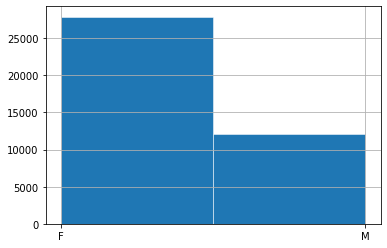

In [ ]:
data_clients['gender'].hist(bins=len(data_clients['gender'].unique()),linewidth=0.5,edgecolor='white')


In [ ]:
data_clients['BAD'].unique()

array([0, 1])

Text(0, 0.5, 'Frequência')

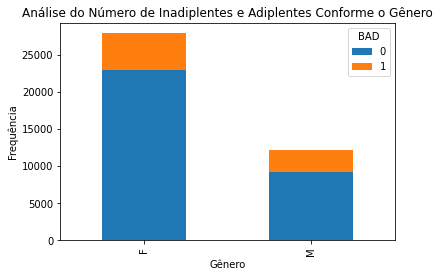

In [ ]:
adiplentes = data_clients.groupby(['gender','BAD'])['BAD'].count().unstack('BAD').fillna(0)
adiplentes[[0, 1]].plot(kind='bar', stacked=True) 
plt.title('Análise do Número de Inadiplentes e Adiplentes Conforme o Gênero') 
plt.xlabel('Gênero') 
plt.ylabel('Frequência')

In [ ]:
print('A quantidade de inadiplentes conforme o Gênero é:\n',
      'F = Feminino e M = Masculino\n')
adiplentes

A quantidade de inadiplentes conforme o Gênero é:
 F = Feminino e M = Masculino



BAD,0,1
gender,,
F,22885,5021
M,9215,2879


**Transformando os dados 'objetos' em 'categoricos'**

In [ ]:
categoricas=['gender', 'flagResidencialPhone','flagMothersName',
       'flagFathersName', 'flagResidenceTown_WorkingTown',
       'flagResidenceState_WorkingState', 'flagResidencialAddress_PostalAddress', 'flagOtherCard',
        'flagMobilePhone', 'flagContactPhone']
for coluna in categoricas:
  data_clients[coluna]=pd.Categorical(data_clients[coluna]).codes

In [ ]:
data_clients.isnull().sum()

Unnamed: 0                              0
clientId                                0
shopId                                  0
gender                                  0
maritalStatus                           0
age                                     0
flagResidencialPhone                    0
areaCodeResidencialPhone                0
bestPaymentDay                          0
shopRank                                0
residenceType                           0
monthsInResidence                       0
flagMothersName                         0
flagFathersName                         0
flagResidenceTown_WorkingTown           0
flagResidenceState_WorkingState         0
monthsInTheJob                          0
professionCode                          0
mateIncome                              0
flagResidencialAddress_PostalAddress    0
flagOtherCard                           0
flagMobilePhone                         0
flagContactPhone                        0
personalNetIncome                 

In [ ]:
data_clients.head()

,Unnamed: 0,clientId,shopId,gender,maritalStatus,age,flagResidencialPhone,areaCodeResidencialPhone,bestPaymentDay,shopRank,residenceType,monthsInResidence,flagMothersName,flagFathersName,flagResidenceTown_WorkingTown,flagResidenceState_WorkingState,monthsInTheJob,professionCode,mateIncome,flagResidencialAddress_PostalAddress,flagOtherCard,flagMobilePhone,flagContactPhone,personalNetIncome,BAD
0,1,2,15,0,S,18,1,31,20,0,P,216,1,1,1,1,12,853,0.0,1,0,0,0,300.0,0
1,2,4,12,0,C,47,0,31,25,0,P,180,1,1,0,1,24,35,0.0,1,0,0,0,304.0,0
2,3,5,16,0,S,28,1,31,25,0,O,12,1,1,1,1,12,24,0.0,1,0,0,0,250.0,0
3,4,6,24,1,S,26,0,31,28,0,P,180,1,1,0,1,0,999,0.0,1,0,0,0,800.0,0
4,5,7,55,0,S,22,1,31,12,0,A,0,1,1,1,1,48,999,0.0,1,0,0,0,410.0,0


Text(0, 0.5, 'Frequência')

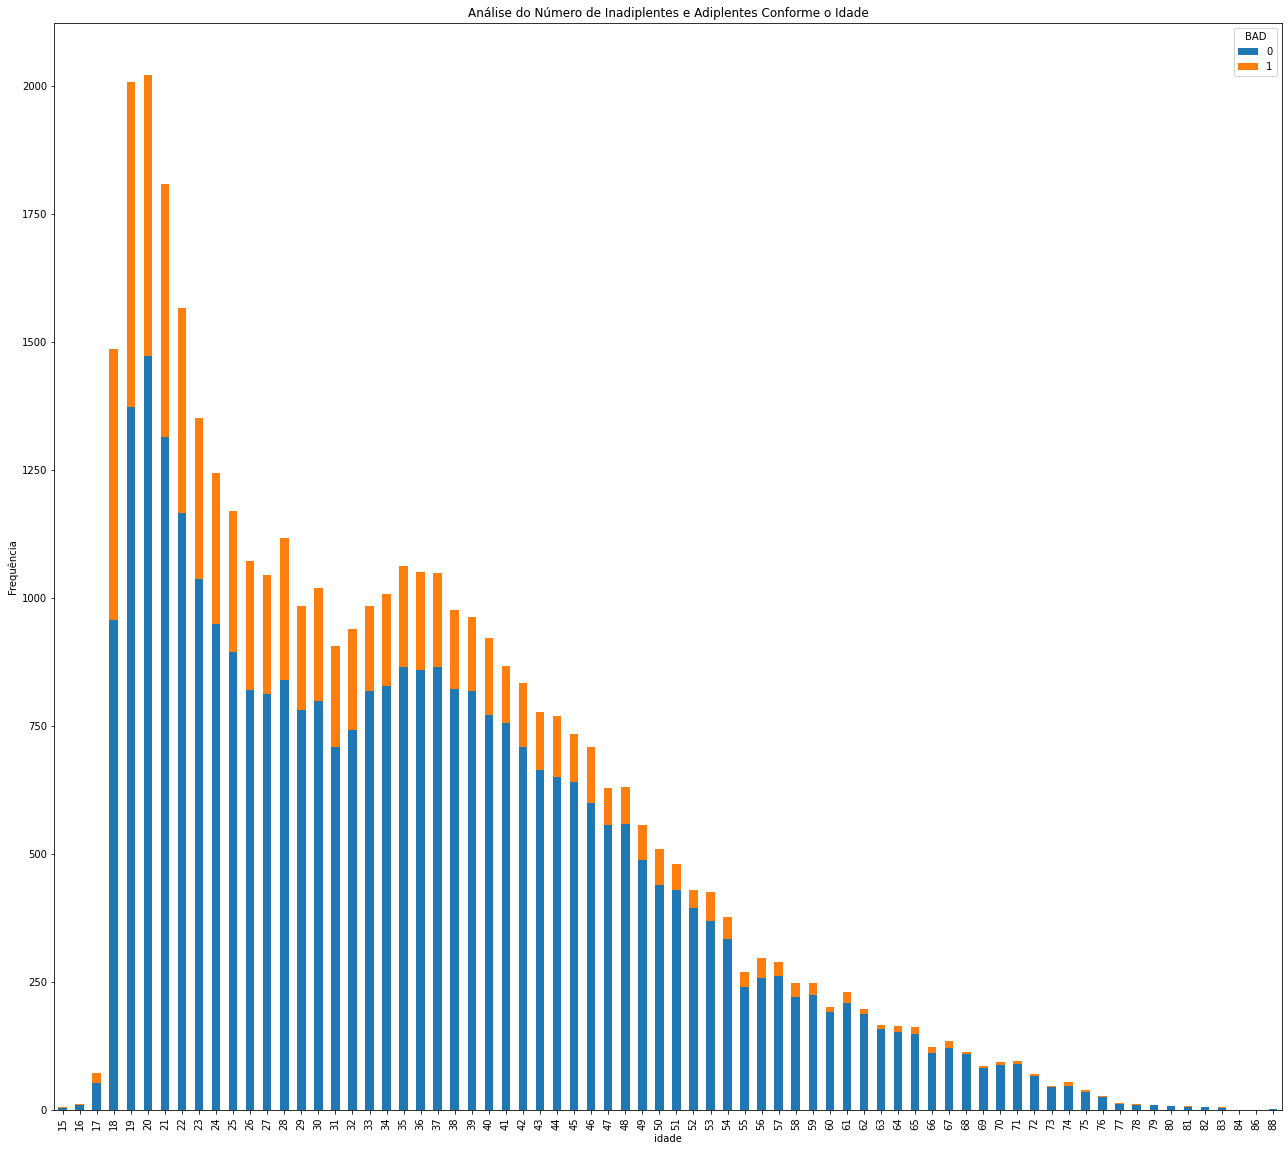

In [ ]:
adiplentes = data_clients.groupby(['age','BAD'])['BAD'].count().unstack('BAD').fillna(0)
adiplentes[[0, 1]].plot(kind='bar',figsize=(22,20), stacked=True) 
plt.title('Análise do Número de Inadiplentes e Adiplentes Conforme o Idade') 
plt.xlabel('idade') 
plt.ylabel('Frequência')

In [ ]:
data_clients['age'].unique()

array([18, 47, 28, 26, 22, 21, 27, 57, 53, 32, 36, 49, 44, 46, 20, 17, 41,
       64, 71, 24, 23, 40, 31, 30, 39, 55, 66, 35, 19, 42, 62, 38, 75, 58,
       34, 50, 61, 56, 45, 51, 37, 48, 52, 25, 43, 74, 29, 54, 33, 60, 59,
       72, 65, 69, 73, 67, 76, 82, 68, 63, 77, 70, 16, 79, 80, 86, 15, 78,
       83, 88, 81, 84])

In [ ]:
print('A quantidade de inadiplentes conforme o Idade é:\n')
adiplentes

A quantidade de inadiplentes conforme o Idade é:



BAD,0,1
age,,
15,4.0,1.0
16,9.0,3.0
17,52.0,20.0
18,957.0,529.0
19,1372.0,635.0
...,...,...
82,6.0,0.0
83,4.0,2.0
84,1.0,0.0


Text(0, 0.5, 'Frequência')

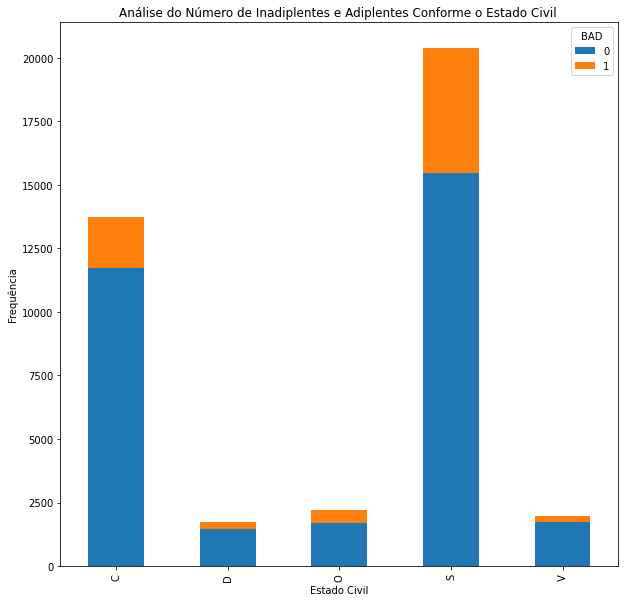

In [ ]:
adiplentes = data_clients.groupby(['maritalStatus','BAD'])['BAD'].count().unstack('BAD').fillna(0)
adiplentes[[0, 1]].plot(kind='bar',figsize=(10,10), stacked=True) 
plt.title('Análise do Número de Inadiplentes e Adiplentes Conforme o Estado Civil ') 
plt.xlabel('Estado Civil') 
plt.ylabel('Frequência')
#plt.legend(data_clients['maritalStatus'])

In [ ]:
print('maritalStatus: S = Solteiro, C = Casado, D = Divorciado, V = Viúvo e O = Outro.\n')
adiplentes

maritalStatus: S = Solteiro, C = Casado, D = Divorciado, V = Viúvo e O = Outro.



BAD,0,1
maritalStatus,,
C,11725,1996
D,1464,259
O,1703,517
S,15481,4894
V,1727,234


residenceType: P = Própria, A = Aluguel, C = Mora com os pais e O = Outro



Text(0, 0.5, 'Frequência')

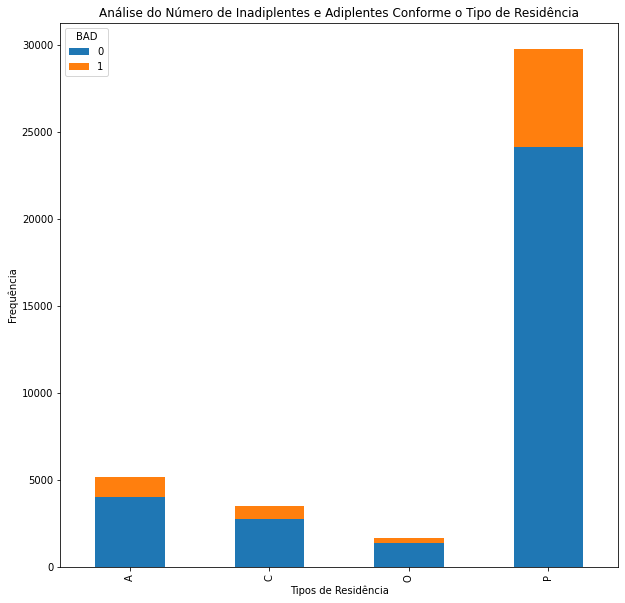

In [ ]:
print('residenceType: P = Própria, A = Aluguel, C = Mora com os pais e O = Outro\n')
adiplentes = data_clients.groupby(['residenceType','BAD'])['BAD'].count().unstack('BAD').fillna(0)
adiplentes[[0, 1]].plot(kind='bar',figsize=(10,10), stacked=True) 
plt.title('Análise do Número de Inadiplentes e Adiplentes Conforme o Tipo de Residência') 
plt.xlabel('Tipos de Residência') 
plt.ylabel('Frequência')

Text(0, 0.5, 'Frequência')

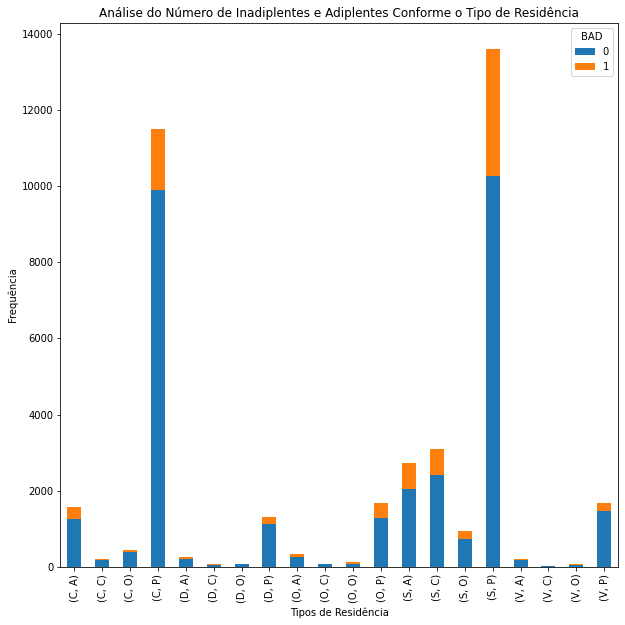

In [ ]:
adiplentes = data_clients.groupby(['maritalStatus','residenceType','BAD'])['BAD'].count().unstack('BAD').fillna(0)
adiplentes[[0, 1]].plot(kind='bar',figsize=(10,10), stacked=True) 
plt.title('Análise do Número de Inadiplentes e Adiplentes Conforme o Tipo de Residência') 
plt.xlabel('Tipos de Residência') 
plt.ylabel('Frequência')

In [ ]:
print('Onde: maritalStatus: S = Solteiro, C = Casado, D = Divorciado, V = Viúvo e O = Outro.\n'
 'residenceType: P = Própria, A = Aluguel, C = Mora com os pais e O = Outro.')
adiplentes

Onde: maritalStatus: S = Solteiro, C = Casado, D = Divorciado, V = Viúvo e O = Outro.
residenceType: P = Própria, A = Aluguel, C = Mora com os pais e O = Outro.


BAD                              0     1
maritalStatus residenceType             
C             A               1267   314
              C                167    40
              O                378    64
              P               9913  1578
D             A                209    51
              C                 53    10
              O                 67    13
              P               1135   185
O             A                263    84
              C                 61    25
              O                 86    37
              P               1293   371
S             A               2050   681
              C               2417   686
              O                740   198
              P              10274  3329
V             A                189    22
              C                 10     2
              O                 57     7
              P               1471   203

In [ ]:
data_clients = data_clients.drop(columns=['flagOtherCard',	'flagMobilePhone',	'flagContactPhone'])

**transformando as colunas maritalStatus e residenceType em objetos**

In [ ]:
data_clients = pd.get_dummies(data_clients,columns=['maritalStatus','residenceType'])
data_clients.head(10)

,Unnamed: 0,clientId,shopId,gender,age,flagResidencialPhone,areaCodeResidencialPhone,bestPaymentDay,shopRank,monthsInResidence,flagMothersName,flagFathersName,flagResidenceTown_WorkingTown,flagResidenceState_WorkingState,monthsInTheJob,professionCode,mateIncome,flagResidencialAddress_PostalAddress,personalNetIncome,BAD,maritalStatus_C,maritalStatus_D,maritalStatus_O,maritalStatus_S,maritalStatus_V,residenceType_A,residenceType_C,residenceType_O,residenceType_P
0,1,2,15,0,18,1,31,20,0,216,1,1,1,1,12,853,0.0,1,300.0,0,0,0,0,1,0,0,0,0,1
1,2,4,12,0,47,0,31,25,0,180,1,1,0,1,24,35,0.0,1,304.0,0,1,0,0,0,0,0,0,0,1
2,3,5,16,0,28,1,31,25,0,12,1,1,1,1,12,24,0.0,1,250.0,0,0,0,0,1,0,0,0,1,0
3,4,6,24,1,26,0,31,28,0,180,1,1,0,1,0,999,0.0,1,800.0,0,0,0,0,1,0,0,0,0,1
4,5,7,55,0,22,1,31,12,0,0,1,1,1,1,48,999,0.0,1,410.0,0,0,0,0,1,0,1,0,0,0
5,6,8,6,0,21,1,23,28,0,24,1,1,1,1,12,40,800.0,1,248.0,0,1,0,0,0,0,1,0,0,0
6,7,9,3,0,27,1,31,20,0,0,1,1,1,1,0,950,0.0,1,1000.0,1,0,0,0,1,0,1,0,0,0
7,8,10,23,0,57,1,31,12,0,24,1,1,0,1,96,13,0.0,1,856.0,0,1,0,0,0,0,0,0,0,1
8,9,11,25,0,53,1,31,18,0,60,1,1,0,1,24,13,0.0,1,738.0,1,0,0,0,1,0,0,0,0,1
9,10,12,12,0,32,1,31,12,0,24,1,1,0,1,0,165,0.0,1,700.0,0,1,0,0,0,0,0,0,0,1


## processamento

In [ ]:
entradas = ['gender', 'age',
       'shopRank', 'monthsInResidence', 'flagResidenceState_WorkingState',
       'monthsInTheJob', 'mateIncome',
       'flagResidencialAddress_PostalAddress', 'personalNetIncome',
       'maritalStatus_C', 'maritalStatus_D', 'maritalStatus_O',
       'maritalStatus_S', 'maritalStatus_V', 'residenceType_A',
       'residenceType_C', 'residenceType_O', 'residenceType_P']
saida = ['BAD']

In [ ]:
x = data_clients[entradas]
y = data_clients[saida]

In [ ]:
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20,random_state=1)

In [ ]:
# realiza o processo de normalização dos dados
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  
scaler.fit(x_train)  

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

**treinamento do modelo**

### knn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=7) #utiliza a construção por meio de 5 vizinhos
classifier.fit(x_train, y_train) # aplica a classificação

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
#constroi a matriz de confusão para comparar o modelo criado
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[6064  355]
 [1451  130]]
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      6419
           1       0.27      0.08      0.13      1581

    accuracy                           0.77      8000
   macro avg       0.54      0.51      0.50      8000
weighted avg       0.70      0.77      0.72      8000



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


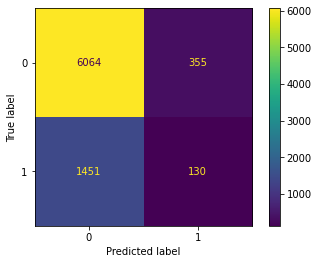

In [ ]:
from sklearn.metrics import classification_report, plot_confusion_matrix
plot_confusion_matrix(classifier, x_test, y_test);

**tendo como parâmetros de entrada:** 'gender', 'age', 'shopRank', 'monthsInResidence', 'flagResidenceState_WorkingState', 'monthsInTheJob', 'mateIncome','flagResidencialAddress_PostalAddress', 'personalNetIncome',      'maritalStatus_C', 'maritalStatus_D', 'maritalStatus_O','maritalStatus_S', 'maritalStatus_V', 'residenceType_A',residenceType_C', 'residenceType_O', 'residenceType_P':


In [ ]:
print('Temos que a precisão é:\n', 6064/(6064+355))
print('A acurácia é:\n', 0.77)

Temos que a precisão é:
 0.9446954354260788
A acurácia é:
 0.77


**Fazendo uma analise para o estado Civil, tipo de residencia, idade e genero**

In [ ]:
entradas = ['gender', 'age','maritalStatus_C', 'maritalStatus_D', 'maritalStatus_O',
       'maritalStatus_S', 'maritalStatus_V', 'residenceType_A',
       'residenceType_C', 'residenceType_O', 'residenceType_P']
saida = ['BAD']

In [ ]:
x = data_clients[entradas]
y = data_clients[saida]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20,random_state=1)


In [ ]:
scaler = StandardScaler()  
scaler.fit(x_train)  

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=10) #utiliza a construção por meio de 10 vizinhos
classifier.fit(x_train, y_train) # aplica a classificação

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=10)

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[6304  115]
 [1534   47]]
              precision    recall  f1-score   support

           0       0.80      0.98      0.88      6419
           1       0.29      0.03      0.05      1581

    accuracy                           0.79      8000
   macro avg       0.55      0.51      0.47      8000
weighted avg       0.70      0.79      0.72      8000



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


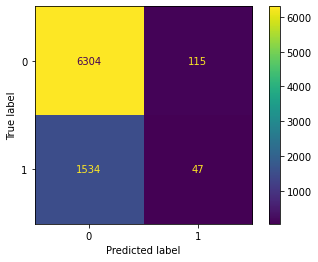

In [ ]:
from sklearn.metrics import classification_report, plot_confusion_matrix,accuracy_score
plot_confusion_matrix(classifier, x_test, y_test);

In [ ]:
print('A precisão é de:\n',6304/(6304+47))
print('A acuracia do modelo é:\n', 0.79)

A precisão é de:
 0.9925995906156511
A acuracia do modelo é:
 0.79


### regressão logística

**Usaremos os mesmo parâmetros de entrada usados no KNN**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
entradas = ['gender', 'age',
       'shopRank', 'monthsInResidence', 'flagResidenceState_WorkingState',
       'monthsInTheJob', 'mateIncome',
       'flagResidencialAddress_PostalAddress', 'personalNetIncome',
       'maritalStatus_C', 'maritalStatus_D', 'maritalStatus_O',
       'maritalStatus_S', 'maritalStatus_V', 'residenceType_A',
       'residenceType_C', 'residenceType_O', 'residenceType_P']
saida = ['BAD']

In [ ]:
x = data_clients[entradas]
y = data_clients[saida]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20,random_state=1)

In [ ]:
scaler = StandardScaler()  
scaler.fit(x_train)  

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
regression_logs = LogisticRegression()
regression_logs.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
y_pred = regression_logs.predict(x_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[6419    0]
 [1581    0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      6419
           1       0.00      0.00      0.00      1581

    accuracy                           0.80      8000
   macro avg       0.40      0.50      0.45      8000
weighted avg       0.64      0.80      0.71      8000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


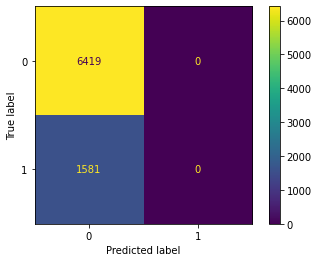

In [ ]:
plot_confusion_matrix(regression_logs,x_test,y_test);

**A regressão logística para os parâmetros de entrada:**'gender', 'age' 'shopRank', 'monthsInResidence', 'flagResidenceState_WorkingState','monthsInTheJob', 'mateIncome', 'flagResidencialAddress_PostalAddress', 'personalNetIncome','maritalStatus_C', 'maritalStatus_D', 'maritalStatus_O' 'maritalStatus_S', 'maritalStatus_V', 'residenceType_A', 'residenceType_C', 'residenceType_O', 'residenceType_P';**saida** = 'BAD'.

In [ ]:
print('tem uma precisão de:\n',6419/6419)
print('acuracia é:\n',0.80)

tem uma precisão de:
 1.0
acuracia é:
 0.8


**Usando o primeiro parâmetro de entrada no knn, ou seja, analisando estado Civil, tipo de residencia, idade e genero**



In [ ]:
entradas = [ 'age','maritalStatus_C', 'maritalStatus_D', 'maritalStatus_O',
       'maritalStatus_S', 'maritalStatus_V', 'residenceType_A',
       'residenceType_C', 'residenceType_O', 'residenceType_P']
saida = ['BAD']

In [ ]:
x = data_clients[entradas]
y = data_clients[saida]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20,random_state=1)

In [ ]:
scaler = StandardScaler()  
scaler.fit(x_train)  

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
regression_logs = LogisticRegression()
regression_logs.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
y_pred = regression_logs.predict(x_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[6419    0]
 [1581    0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      6419
           1       0.00      0.00      0.00      1581

    accuracy                           0.80      8000
   macro avg       0.40      0.50      0.45      8000
weighted avg       0.64      0.80      0.71      8000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


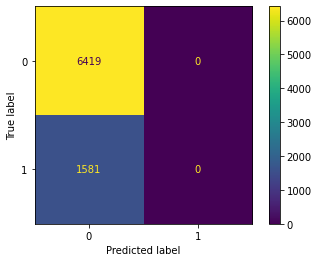

In [ ]:
plot_confusion_matrix(regression_logs,x_test,y_test);

In [ ]:
print('precisão:\n',6419/6419)
print('acurácia:\n',0.80)

precisão:
 1.0
acurácia:
 0.8


para os parâmtros mencionados temos:
1. acurácia: 1.0
2. precisão: 0.8

### SVM

**por fim aplicaremos um svm para fazermos as análises**

In [ ]:
from sklearn.svm import SVC

In [ ]:
classifier_svm = SVC(gamma='auto')

**sendo os parâmetros de entrada e saida:**
entradas = ['gender', 'age',
       'shopRank', 'monthsInResidence', 'flagResidenceState_WorkingState',
       'monthsInTheJob', 'mateIncome',
       'flagResidencialAddress_PostalAddress', 'personalNetIncome',
       'maritalStatus_C', 'maritalStatus_D', 'maritalStatus_O',
       'maritalStatus_S', 'maritalStatus_V', 'residenceType_A',
       'residenceType_C', 'residenceType_O', 'residenceType_P']
saida = ['BAD']

In [ ]:
entradas = ['gender', 'age',
       'shopRank', 'monthsInResidence', 'flagResidenceState_WorkingState',
       'monthsInTheJob', 'mateIncome',
       'flagResidencialAddress_PostalAddress', 'personalNetIncome',
       'maritalStatus_C', 'maritalStatus_D', 'maritalStatus_O',
       'maritalStatus_S', 'maritalStatus_V', 'residenceType_A',
       'residenceType_C', 'residenceType_O', 'residenceType_P']
saida = ['BAD']

In [ ]:
x = data_clients[entradas]
y = data_clients[saida]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20,random_state=1)

In [ ]:
classifier_svm.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(gamma='auto')

In [ ]:
y_pred=classifier_svm.predict(x_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[6277  142]
 [1520   61]]
              precision    recall  f1-score   support

           0       0.81      0.98      0.88      6419
           1       0.30      0.04      0.07      1581

    accuracy                           0.79      8000
   macro avg       0.55      0.51      0.48      8000
weighted avg       0.71      0.79      0.72      8000



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


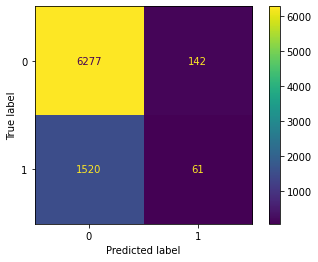

In [ ]:
plot_confusion_matrix(classifier_svm,x_test,y_test);

In [ ]:
print('precisão:',6277/(6277+142))

precisão: 0.9778781741704315


**quando entramos com os parâmetros de entrada e saida:**entradas = [ 'age','maritalStatus_C', 'maritalStatus_D', 'maritalStatus_O','maritalStatus_S', 'maritalStatus_V', 'residenceType_A','residenceType_C', 'residenceType_O', 'residenceType_P']
;
saida = ['BAD']

In [ ]:
entradas = [ 'age','maritalStatus_C', 'maritalStatus_D', 'maritalStatus_O',
       'maritalStatus_S', 'maritalStatus_V', 'residenceType_A',
       'residenceType_C', 'residenceType_O', 'residenceType_P']
saida = ['BAD']

In [ ]:
x = data_clients[entradas]
y = data_clients[saida]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20,random_state=1)

In [ ]:
classifier_svm.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(gamma='auto')

In [ ]:
y_pred=classifier_svm.predict(x_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[6418    1]
 [1579    2]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      6419
           1       0.67      0.00      0.00      1581

    accuracy                           0.80      8000
   macro avg       0.73      0.50      0.45      8000
weighted avg       0.78      0.80      0.71      8000



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


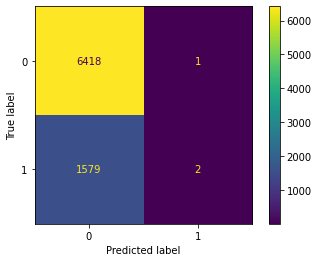

In [ ]:
plot_confusion_matrix(classifier_svm,x_test,y_test);

In [ ]:
print('precisão',6418/(6418+1))
print('acurácia',0.8)

precisão 0.999844212494158
acurácia 0.8


In [ ]:
para os parâmetros dados temos que a precisão é de: 0.9998;acurácia:0.8.

#Análise de resultados



**Diante dos dados obtidos em KNN, regressão logística e svm podemos prever as seguintes relações diante dos resultados obtidos pelos dados de teste.**

###**Quando temos os parâmetros de entrada:**

entradas = ['gender', 'age',
       'shopRank', 'monthsInResidence', 'flagResidenceState_WorkingState',
       'monthsInTheJob', 'mateIncome',
       'flagResidencialAddress_PostalAddress', 'personalNetIncome',
       'maritalStatus_C', 'maritalStatus_D', 'maritalStatus_O',
       'maritalStatus_S', 'maritalStatus_V', 'residenceType_A',
       'residenceType_C', 'residenceType_O', 'residenceType_P']. Temos que a precisão é: 0.9446954354260788 A acurácia é: 0.77. 
       
       E a matriz de confusão nos diz:
 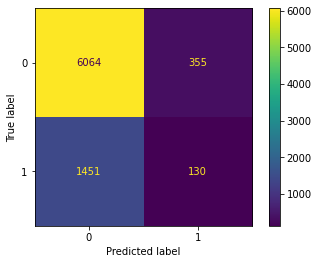

Com isso verificamos que no conjunto de 8000 pessoas teste:

1. previu que 6064 são adiplentes
2. previu que 130 são inadiplentes
3. previu adiplentes incorretamente 355 vezes 
4. previu inadiplentes incorretamente 1451 vezes

**Quando temos os parâmetro de entrada:**

entradas = ['gender', 'age','maritalStatus_C', 'maritalStatus_D', 'maritalStatus_O','maritalStatus_S', 'maritalStatus_V', 'residenceType_A','residenceType_C', 'residenceType_O', 'residenceType_P']
Temos A precisão é de:0.9925995906156511; acuracia do modelo é: 0.79.

Pela matriz de confusão destes parâmetros de entrada

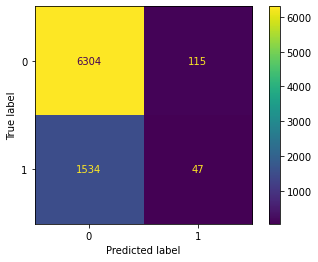

Com isso verificamos que no conjunto de 8000 pessoas do grupo de teste:
1. previu que 6304 são adiplentes
2. previu que 47 são inadiplentes
3. previu adiplentes incorretamente 115 vezes 
4. previu inadiplentes incorretamente 1534 vezes

## **Análise da Regressão logística**

**Quando os parâmetros de entrada são:**

entradas = 'gender', 'age','shopRank', 'monthsInResidence', 'flagResidenceState_WorkingState','monthsInTheJob', 'mateIncome','flagResidencialAddress_PostalAddress', 'personalNetIncome','maritalStatus_C', 'maritalStatus_D', 'maritalStatus_O', 'maritalStatus_S', 'maritalStatus_V', 'residenceType_A','residenceType_C', 'residenceType_O', 'residenceType_P'.

Temos tem uma precisão de: 1.0; acuracia é: 0.8.

Pela matriz de confusão notamos que

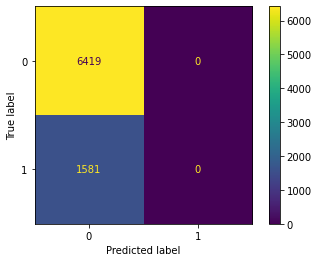


Diante da matriz, vemos que:

1. previu que 6419 são adiplentes
2. previu que 0 são inadiplentes
3. previu adiplentes incorretamente 0 vezes 
4. previu inadiplentes incorretamente 1581 vezes

**Tendo como parâmetro de entrada:**entradas = [ 'age','maritalStatus_C', 'maritalStatus_D', 'maritalStatus_O','maritalStatus_S', 'maritalStatus_V', 'residenceType_A','residenceType_C', 'residenceType_O', 'residenceType_P'].
Verificamos que: A precisão é 0.999844212494158; acurácia 0.8.

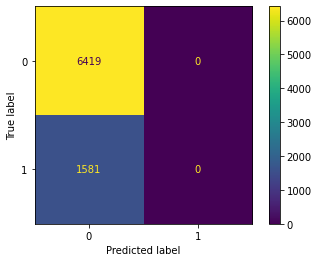

Com base na matriz de confusão depreendemos que:

1. previu que 6419 são adiplentes
2. previu que 0 são inadiplentes
3. previu adiplentes incorretamente 0 vezes 
4. previu inadiplentes incorretamente 1581 vezes

## Análise do SVM

**Tendo como parâmetros de entrada:**

entradas = ['gender', 'age',
       'shopRank', 'monthsInResidence', 'flagResidenceState_WorkingState',
       'monthsInTheJob', 'mateIncome',
       'flagResidencialAddress_PostalAddress', 'personalNetIncome',
       'maritalStatus_C', 'maritalStatus_D', 'maritalStatus_O',
       'maritalStatus_S', 'maritalStatus_V', 'residenceType_A',
       'residenceType_C', 'residenceType_O', 'residenceType_P'].

Possuímos: precisão de 0.9778781741704315;acurácia:0.79.

Com a matriz de confusão:

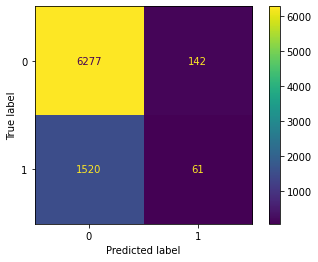

Pela matriz de confusão depreendemos que:

1. previu que 6277 são adiplentes
2. previu que 61 são inadiplentes
3. previu adiplentes incorretamente 142 vezes 
4. previu inadiplentes incorretamente 1520 vezes

**Quando os parâmetros de entrada são:**

entradas = [ 'age','maritalStatus_C', 'maritalStatus_D', 'maritalStatus_O',
       'maritalStatus_S', 'maritalStatus_V', 'residenceType_A',
       'residenceType_C', 'residenceType_O', 'residenceType_P'].

Possuímos:Precisão 0.999844212494158; acurácia 0.8.

Pela matriz de confusão:

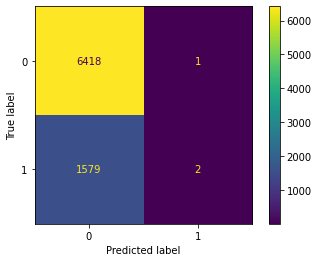

Desta depreendemos que:

1. previu que 6418 são adiplentes
2. previu que 2 são inadiplentes
3. previu adiplentes incorretamente 1 vezes 
4. previu inadiplentes incorretamente 1579 vezes